## - 불러올 패키지 목록

In [1]:
# 수학 함수 패키지
import math

# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# statsmodels 패키지
from statsmodels.api import *
from statsmodels.stats.api import *
from statsmodels.stats.proportion import *
from statsmodels.stats.diagnostic import *
from statsmodels.stats.weightstats import *
from statsmodels.formula.api import *

# SciPy 패키지
import scipy.stats as stats  # 통계 분석을 위한 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지

# pingouin 패키지
import pingouin as pg

# scikit-learn 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지
from sklearn.linear_model import *    # 선형 회귀 분석을 위한 패키지 (로지스틱 회귀 포함)
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.tree import *  # 의사결정나무 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공
from sklearn.neighbors import *  # kNN 알고리즘 제공
from sklearn.svm import *  # 서포트 벡터 머신 알고리즘 제공
from sklearn.mixture import *  # 혼합분포군집(GMM 등) 알고리즘 제공
from sklearn.decomposition import *  # 차원축소 알고리즘 제공

# mlxtend 패키지
from mlxtend.preprocessing import *  # 연관분석에 필요한 트랜잭션 전처리 알고리즘 포함
from mlxtend.frequent_patterns import *  # 연관분석에 사용되는 알고리즘 포함 
from mlxtend.plotting import plot_decision_regions

# missingno 패키지 (데이터 전처리 전 결측치 확인)
import missingno as msno

# label별 데이터 카운트를 위한 모듈
from collections import Counter  # https://docs.python.org/3/library/collections.html

# 시각화를 위한 패키지
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # 내장 colormap, colormap 처리 유틸리티
from matplotlib.colors import ListedColormap  # colors and colormaps
from mlxtend.plotting import plot_decision_regions
%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False

# 상관계수의 추정과 검정

In [2]:
df_student = pd.read_csv( r'C:\Users\Boanerges\GitHub\TIL\rawdata\Student.csv',
                          index_col = 'ID')

df_student

,Age,Income,Expense
ID,,,
1,25,170,67
2,28,177,62
3,20,165,53
4,16,150,48
5,19,160,58
6,21,160,59
7,22,173,60
8,16,169,57
9,20,169,70


In [18]:
# 데이터 값 실수. 소수점 셋째 자리까지 표시
# .round(3) 사용 또는 pd.options.display.float_format = '{:.3f}'.format

df_student.describe().round(3)

,Age,Income,Expense
count,17.000,17.000,17.000
mean,21.353,171.353,65.765
std,4.271,9.334,10.010
min,16.000,150.000,48.000
25%,19.000,169.000,59.000
50%,20.000,170.000,63.000
75%,25.000,179.000,74.000
max,30.000,189.000,82.000


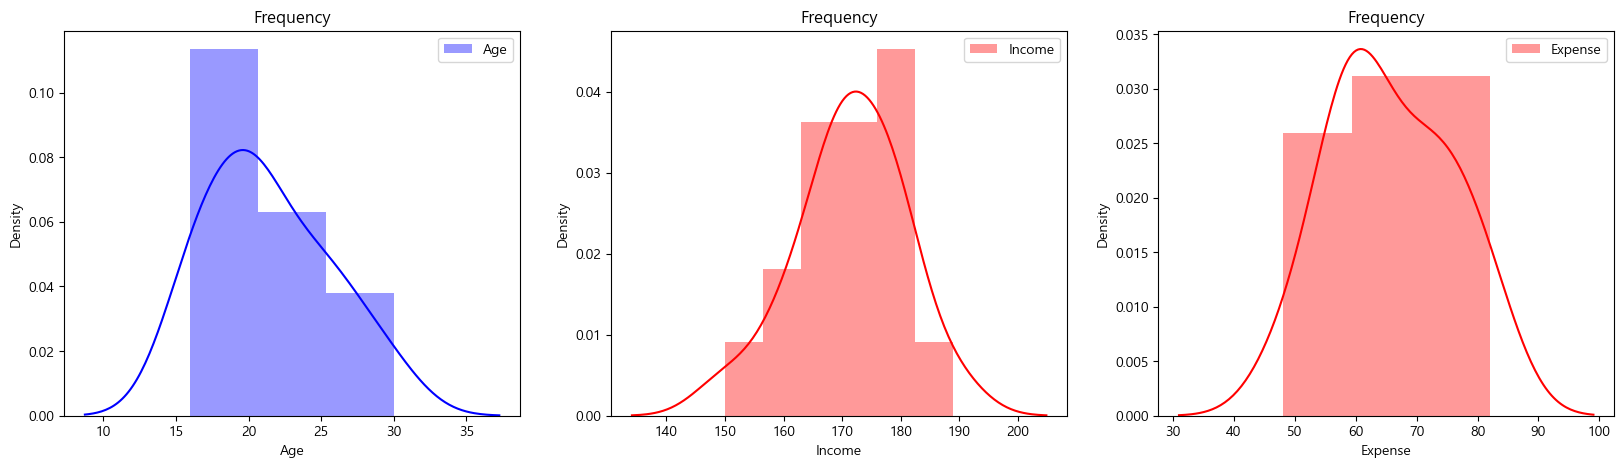

In [4]:
plt.figure(figsize=(20,5))

ax1 = plt.subplot(131)
ax1 = sb.distplot( df_student.Age, label="Age", color = 'blue')
ax1.set( xlabel = "Age", title = "Frequency")
plt.legend()

ax2 = plt.subplot(132)
ax2 = sb.distplot( df_student.Income, label="Income", color = 'red')
ax2.set( xlabel = "Income", title = "Frequency")
plt.legend()

ax3 = plt.subplot(133)
ax3 = sb.distplot( df_student.Expense, label="Expense", color = 'red')
ax3.set( xlabel = "Expense", title = "Frequency")
plt.legend()

plt.show()

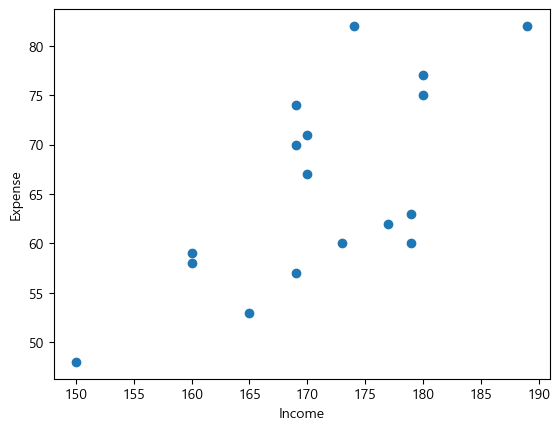

In [5]:
plt.scatter( x = df_student.Income,
             y = df_student.Expense )
plt.xlabel('Income')
plt.ylabel('Expense')
plt.show()

- `seaborn.jointplot()` https://seaborn.pydata.org/generated/seaborn.jointplot.html

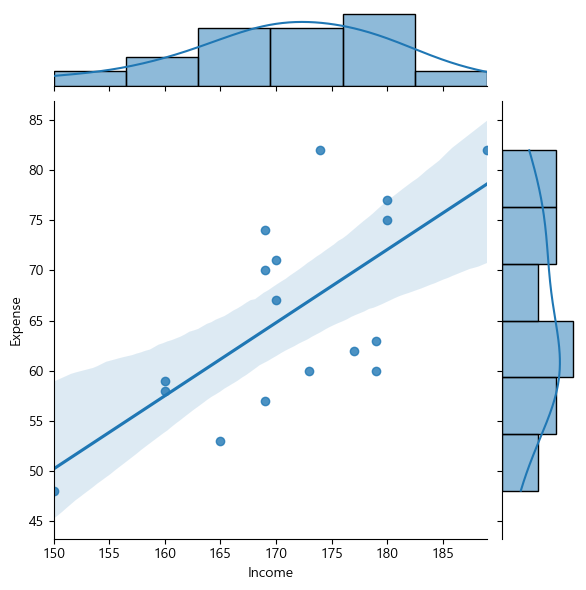

In [6]:
sb.jointplot( df_student.Income,
              df_student.Expense,
              kind = 'reg')
plt.show()

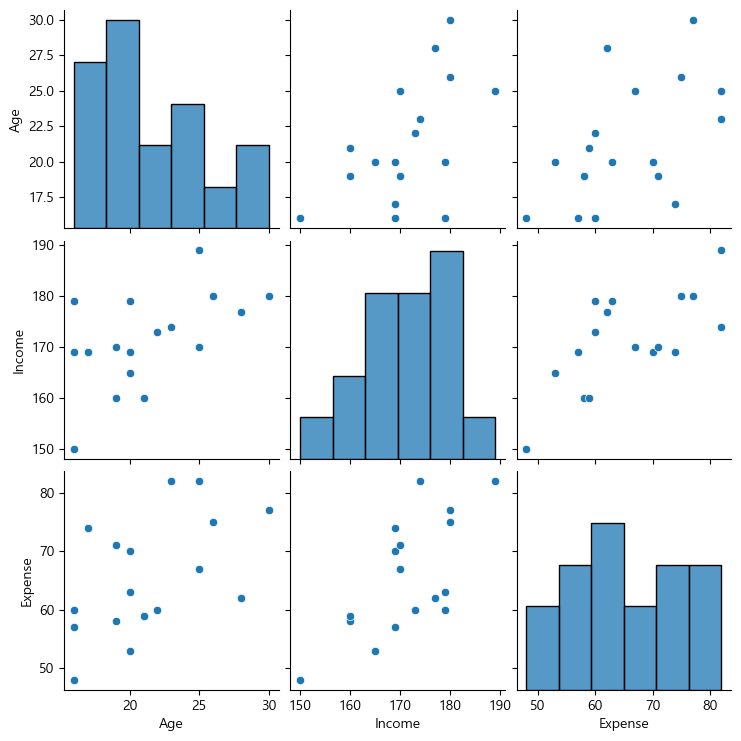

In [7]:
sb.pairplot( df_student.iloc[:, 0:3] )
plt.show()

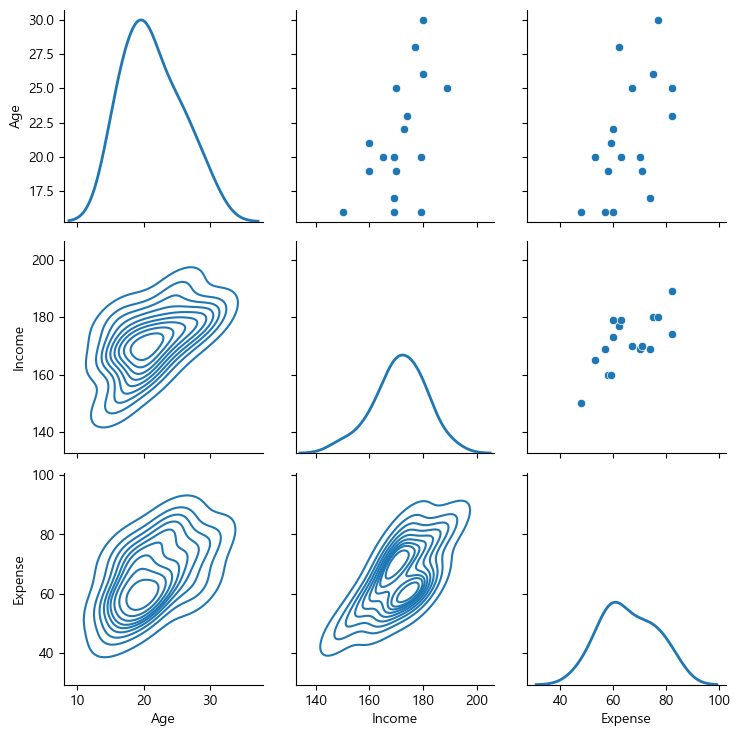

In [8]:
g = sb.PairGrid( df_student.iloc[:, 0:3] )

g.map_upper( sb.scatterplot )
g.map_lower( sb.kdeplot )
g.map_diag( sb.kdeplot, lw=2 )

plt.show()

## 상관계수 계산
- `pandas.DataFrame.corr( method='pearson', min_periods=1 )`  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

In [9]:
data = df_student.iloc[:, 0:3]

p = data.corr()
k = data.corr( method = 'kendall' )
s = data.corr( method = 'spearman' )

print('< Pearson correlation coefficient >')
print( p )
print()

print('< Kendall Tau correlation coefficient >')
print( k )
print()

print('< Spearman rank correlation >')
print( s )
print()

< Pearson correlation coefficient >
              Age    Income   Expense
Age      1.000000  0.546968  0.529814
Income   0.546968  1.000000  0.681296
Expense  0.529814  0.681296  1.000000

< Kendall Tau correlation coefficient >
              Age    Income   Expense
Age      1.000000  0.397059  0.382353
Income   0.397059  1.000000  0.514706
Expense  0.382353  0.514706  1.000000

< Spearman rank correlation >
              Age    Income   Expense
Age      1.000000  0.584263  0.568525
Income   0.584263  1.000000  0.703457
Expense  0.568525  0.703457  1.000000



## 상관계수에 대한 검정

### SciPy 패키지 사용
- `scipy.stats.pearsonr( x, y )`  
Returns : correlation, p-value  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html  

- `scipy.stats.kendalltau( x, y, initial_lexsort=None, nan_policy='propagate', method='auto', variant='b' )`  
Returns : correlation, p-value  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html

- `scipy.stats.spearmanr( a, b=None, axis=0, nan_policy='propagate', alternative='two-sided' )`  
Returns : correlation, p-value  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html

In [10]:
stats.pearsonr( df_student.Income, df_student.Expense )

(0.681295653579454, 0.0026006496946942063)

In [11]:
stats.kendalltau( df_student.Income, df_student.Expense )

KendalltauResult(correlation=0.5248096793919468, pvalue=0.004161694881782424)

In [12]:
stats.spearmanr( df_student.Income, df_student.Expense )

SpearmanrResult(correlation=0.7034573406791971, pvalue=0.001628497538228354)

In [13]:
# 상관계수에 대한 검정 수행

# scipy.stats.pearsonr(x, y)    # 입력 배열

# scipy.stats.kendalltau( x, y,    # 같은 모양의 순위 배열. 만약, 배열이 1차원이 아니라면 1차원으로 평면화된다.
#                         nan_policy = 'propagate',    # 입력에 nan이 포함된 경우 처리 방법을 정의. 기본값은 'propagate'
#                                                      # 'propagate': NaN 을 반환
#                                                      # 'rarise': 에러를 발생시킨다.
#                                                      # 'omit' : NaN 값을 무시하고 계산을 수행
#                         method = 'auto',    # p-값을 계산하는 데 사용되는 방법을 정의. 기본값은 'auto'
#                                             # 'auto': 속도와 정확도 간의 균형을 기반으로 적절한 방법을 선택
#                                             # 'asymptotic': 큰 표본에 유효한 정규 근사값을 사용
#                                             # 'exact': 정확한 p-값을 계산하지만 동률이 없는 경우에만 사용. 샘플 크기가 증가함에 따라 계산 시간이 증가하고 결과의 정밀도에 약간의 손실이 있을 수 있음.
#                         variant ='b' )    # 반환 되는 Kendall 의 tau 변형을 정의. 'b'와 'c' 중에 선택하여 적용. 기본값은 'b'.

# scipy.stats.spearmanr( a, b = None,    # 여러 변수와 관측값을 포함하는 하나 또는 두 개의 1차원 또는 2차원 배열.
#                                        # b 는 선택사항.
#                        axis = 0,    # axis = 0 (기본값)이면 각 열은 행에 관측값이 있는 변수를 나타냄.
#                                     # axis = 1 이면 관계가 전치됨. 각 행은 변수를 나타내고 열은 관측값을 포함함.
#                                     # axis = None이면 두 배열이 모두 얽힌다.
#                        nan_policy = 'propagate',   # 입력에 nan이 포함된 경우 처리 방법을 정의. 기본값은 'propagate'
#                                                    # 'propagate': NaN 을 반환
#                                                    # 'rarise': 에러를 발생시킨다.
#                                                    # 'omit' : NaN 값을 무시하고 계산을 수행
#                        alternative = 'two-sided' )    # 대립 가설을 정의. 기본값은 'two-sided'
#                                                       # 'two-sided': 상관 관계가 0 이 아니다.
#                                                       # 'less': 상관관계가 0 보다 작다.
#                                                       # 'greater': 상관관계가 0 보다 크다.

result = stats.pearsonr( df_student.Income, df_student.Expense )
print( f' correlation: {result[0]:.4f}, \n P-value: {result[1]:.24f} ' )

if result[1] > 0.05:
    print(' p-value > 0.05 이므로 귀무가설 채택. 두 변수 간에는 상관관계가 없다.')
if result[1] < 0.05:
    print(' p-value < 0.05 이므로 귀무가설 기각. 두 변수 간에는 상관관계가 있다.')

 correlation: 0.6813, 
 P-value: 0.002600649694694206256335 
 p-value < 0.05 이므로 귀무가설 기각. 두 변수 간에는 상관관계가 있다.


### pingouin 패키지 사용

- `pingouin.pairwise_corr( data, columns=None, covar=None, alternative='two-sided', method='pearson', padjust='none', nan_policy='pairwise' )` https://pingouin-stats.org/generated/pingouin.pairwise_corr.html

In [19]:
data.pairwise_corr(method='pearson').round(3)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,Age,Income,pearson,two-sided,17,0.547,"[0.09, 0.81]",0.023,3.255,0.653
1,Age,Expense,pearson,two-sided,17,0.530,"[0.07, 0.81]",0.029,2.735,0.619
2,Income,Expense,pearson,two-sided,17,0.681,"[0.3, 0.88]",0.003,19.505,0.889


In [20]:
data.pairwise_corr(method='kendall').round(3)

,X,Y,method,alternative,n,r,CI95%,p-unc,power
0,Age,Income,kendall,two-sided,17,0.444,"[-0.05, 0.76]",0.017,0.448
1,Age,Expense,kendall,two-sided,17,0.397,"[-0.1, 0.74]",0.031,0.364
2,Income,Expense,kendall,two-sided,17,0.525,"[0.06, 0.8]",0.004,0.608


In [21]:
data.pairwise_corr(method='spearman').round(3)

,X,Y,method,alternative,n,r,CI95%,p-unc,power
0,Age,Income,spearman,two-sided,17,0.584,"[0.14, 0.83]",0.014,0.727
1,Age,Expense,spearman,two-sided,17,0.569,"[0.12, 0.82]",0.017,0.696
2,Income,Expense,spearman,two-sided,17,0.703,"[0.34, 0.88]",0.002,0.917


## 상관계수 시각화

- `seaborn.heatmap( data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs )` https://seaborn.pydata.org/generated/seaborn.heatmap.html

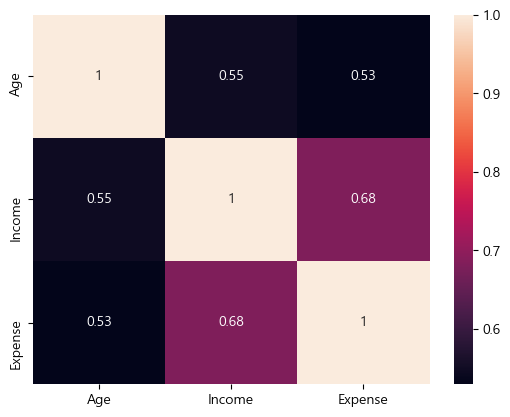

In [17]:
corr_mat = data.corr()

sb.heatmap( corr_mat, annot = True )
plt.show()